In [7]:
import cv2, os, math, glob
import matplotlib.pyplot as plt

from utils.common_tools import annotate_image, show_bgr
from utils.common_tools import stack_videos, assemble_frames_to_video
from utils.common_tools import find_nonzero_bounding_box, trim_video, draw_parallel_lines

from src.detection_routine import detect_objects

In [13]:
def process_videos(base_name_list):
    for image_name in base_name_list:
        base_image_name = image_name

    # Paths for input and output
    truth_log_file_name = f"synth_videos/{base_image_name}/frame_data.txt"
    videos_to_process = [f"synth_videos/{base_image_name}/synth_track"]

    # Create the output directory for processed frames
    processed_frames_dir = f"synth_videos/{base_image_name}/processed_video_frames"
    rect_frames_dir = f"synth_videos/{base_image_name}/rectified_processed_video_frames"
    os.makedirs(processed_frames_dir, exist_ok=True)
    os.makedirs(rect_frames_dir, exist_ok=True)

    # Create or open the processed_data.txt file
    processed_data_file = open(f"synth_videos/{base_image_name}/processed_data.txt", "w")

    # Write the header for the processed_data.txt file
    processed_data_file.write("frame_index,cx,cy,w,h\n")

    for v in videos_to_process:
        video_to_process_path = v + "_video.mp4"
        cap = cv2.VideoCapture(video_to_process_path)

        if not cap.isOpened():
            raise ValueError(f"Error opening video file: {video_to_process_path}")

        for i in range(0, 61):
            if i % 10 == 0:
                print(f"processing frame {i} in {image_name}")
            frame_number = i
            # Set the frame position (0-based index)
            frame_index = frame_number - 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

            # Read the frame
            ret, raw_frame = cap.read()
            if not ret:
                print(f"Frame {frame_index} could not be read.")
                continue

            #raw_frame = raw_frame[0:720,0:1280]
            # Process the frame and get the output data
            rectified_frame,output_frame, cx,cy,w,h, contour_mask = detect_objects(raw_frame,i,debug=True)
            
            # Save the processed frame to the output directory
            output_frame_path = os.path.join(processed_frames_dir, f"frame_{frame_index:03}.jpg")
            rectified_frame_path = os.path.join(rect_frames_dir, f"frame_rect_{frame_index:03}.jpg")

            cv2.imwrite(output_frame_path, output_frame)
            cv2.imwrite(rectified_frame_path, rectified_frame)


            # Write the data for the current frame to processed_data.txt
            processed_data_file.write(f"{frame_index},{cx},{cy},{w},{h}\n")

    # Close the video capture and processed_data.txt file
    cap.release()
    processed_data_file.close()
    output_video_path = f"synth_videos/{base_image_name}/processed_track_video.mp4" 
    output_rect_video_path = f"synth_videos/{base_image_name}/rectified_processed_track_video.mp4" 

    assemble_frames_to_video(processed_frames_dir, output_video_path, fps=5, frame_pattern='frame_*.jpg')
    assemble_frames_to_video(rect_frames_dir, output_rect_video_path, fps=5, frame_pattern='frame_*.jpg')

    output_rectrim_video_path = f"synth_videos/{base_image_name}/processed_rect_trimmed_track_video.mp4"
    trim_video(output_rect_video_path , output_rectrim_video_path)

    stack_videos(video1_path = output_video_path,
                 video2_path = f"synth_videos/{base_image_name}/synth_track_box_video.mp4",
                 output_video_path = f"synth_videos/{base_image_name}/combined_video.mp4")
    
    stack_videos(video1_path = output_rect_video_path,
                 video2_path = f"synth_videos/{base_image_name}/synth_track_box_video.mp4",
                 output_video_path = f"synth_videos/{base_image_name}/rect_combined_video.mp4")
    

processing frame 0 in basic_dot


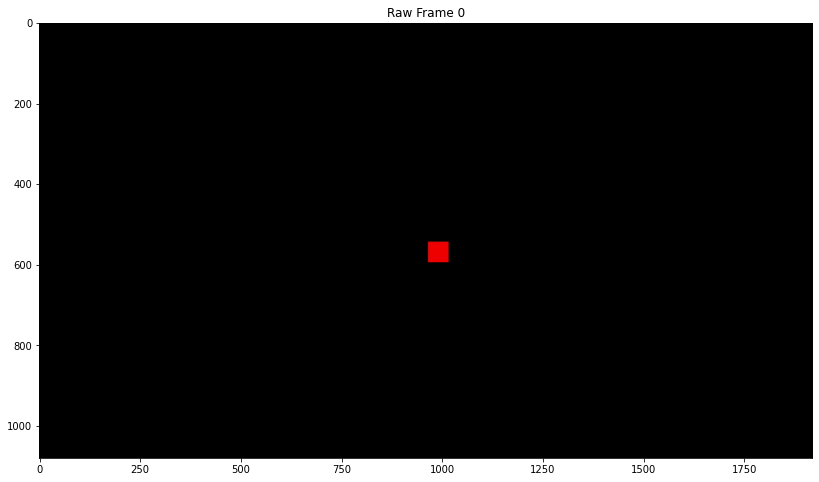

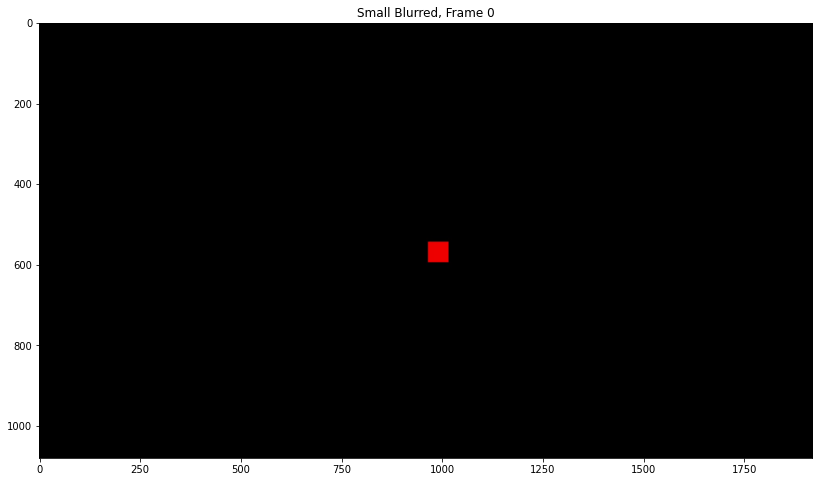

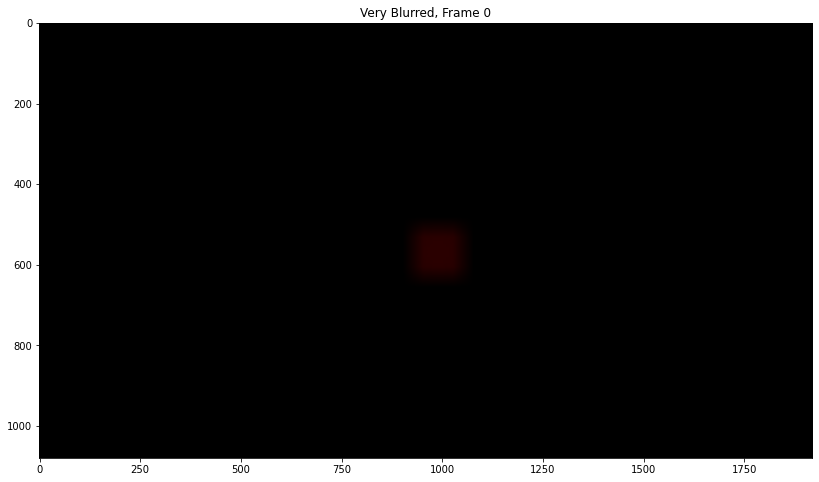

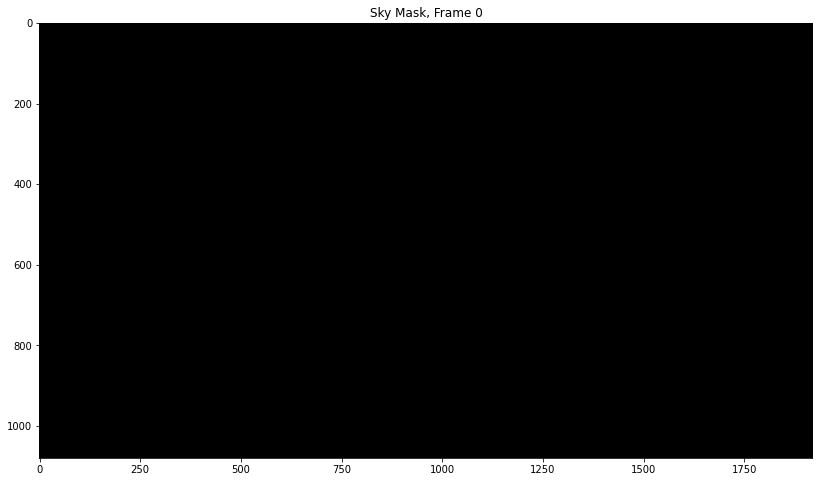

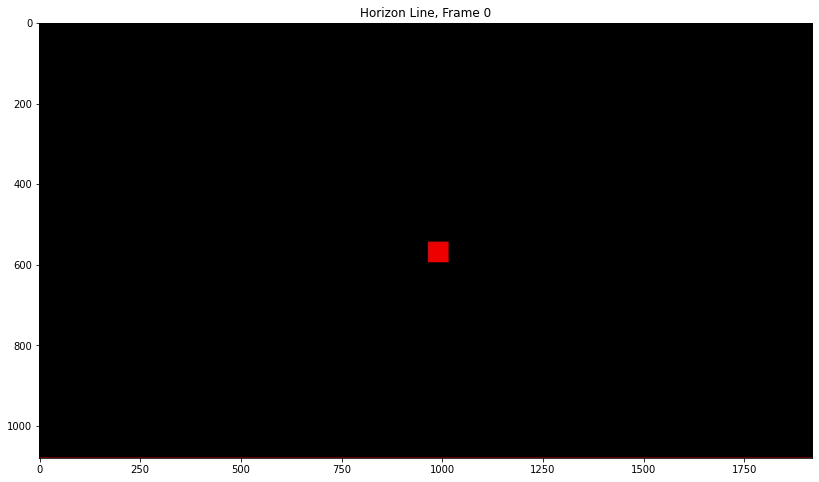

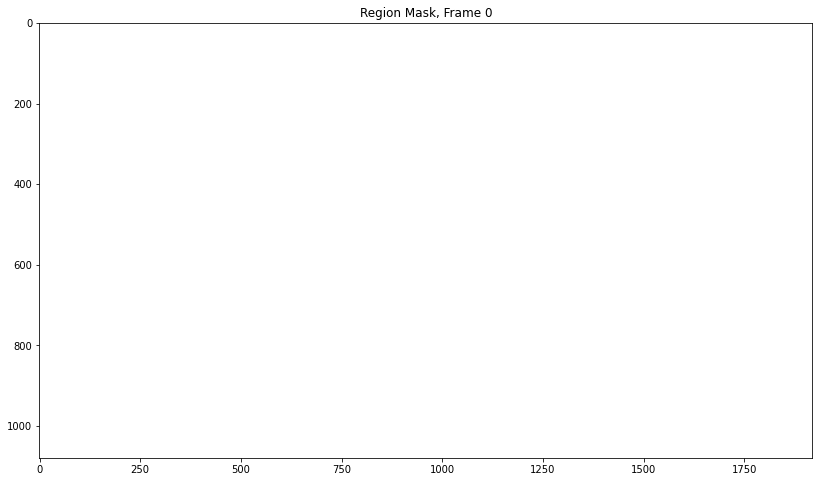

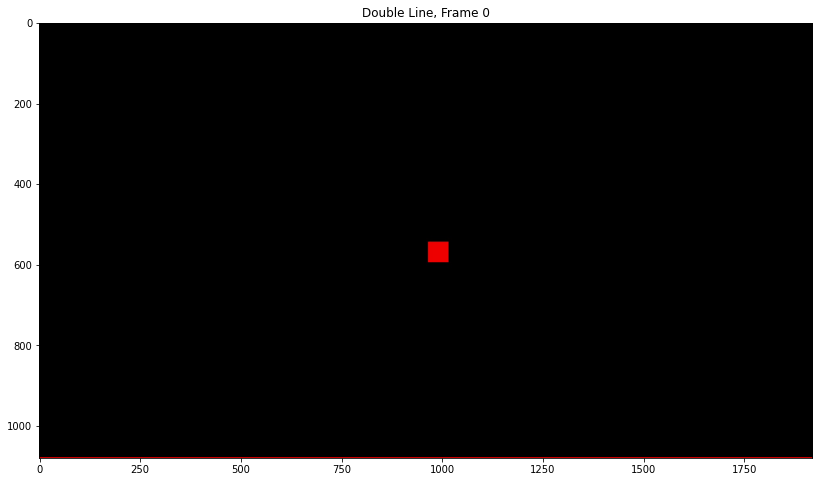

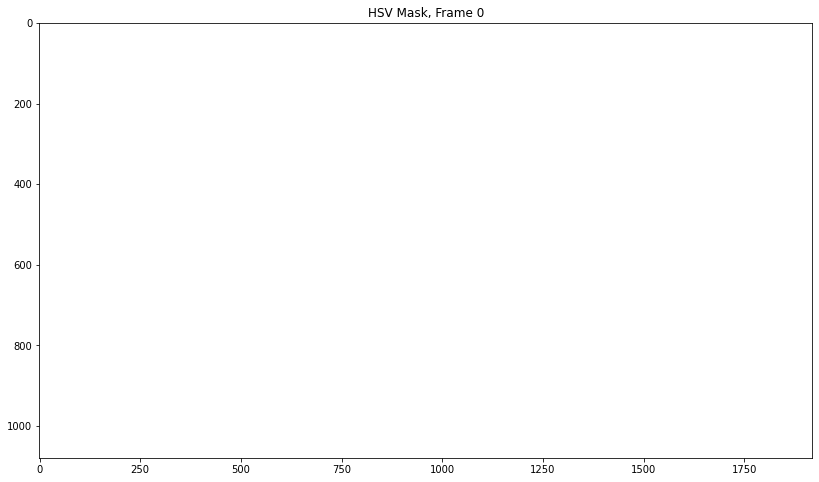

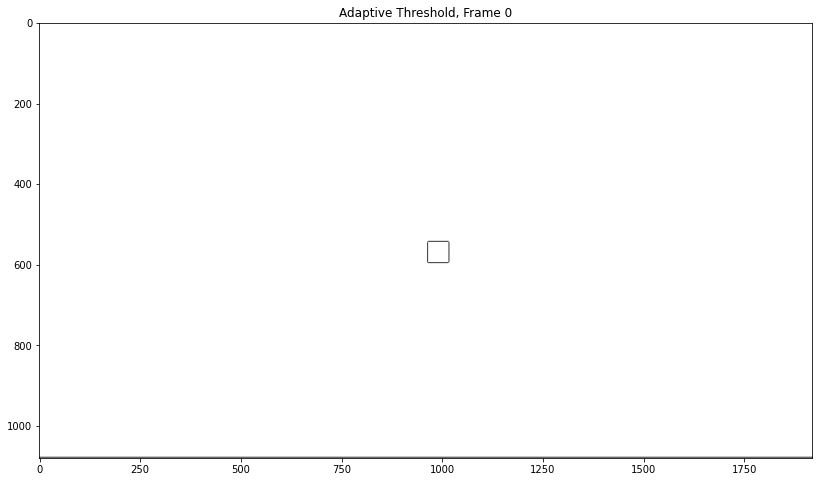

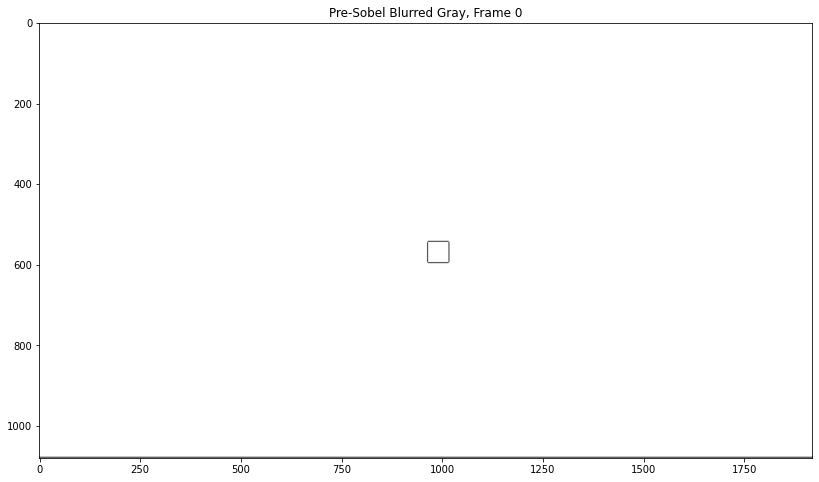

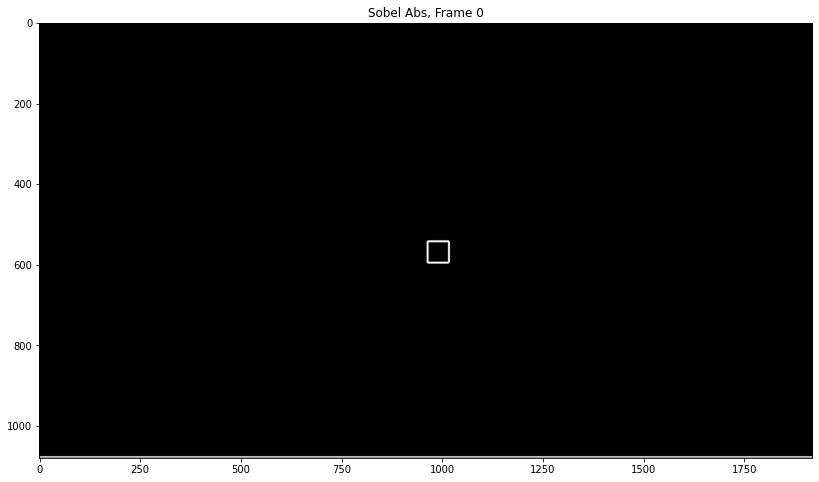

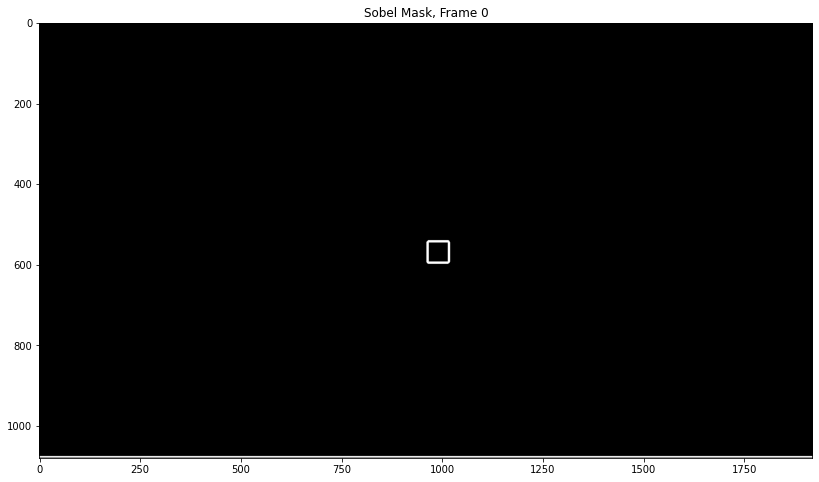

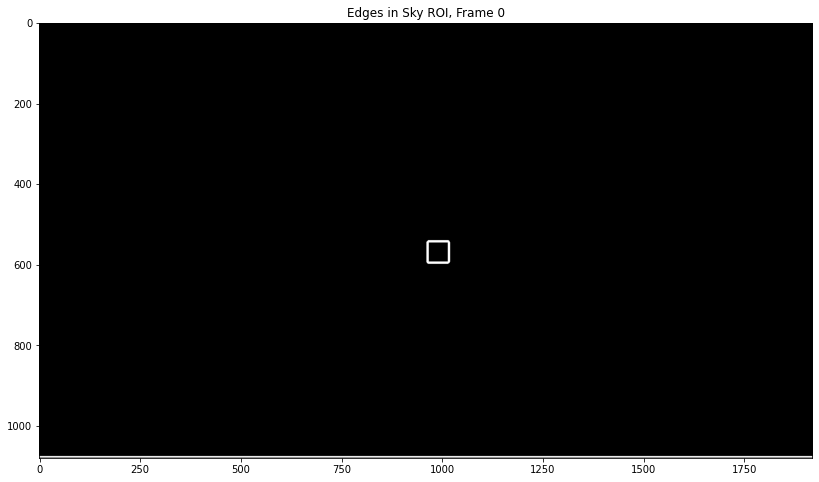

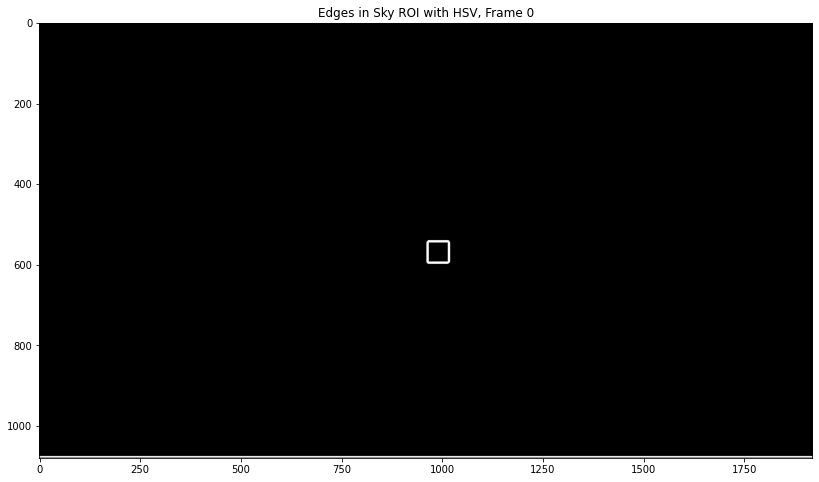

HSV Values
{'min_h': 0, 'max_h': 0, 'min_s': 0, 'max_s': 0, 'min_v': 0, 'max_v': 0}


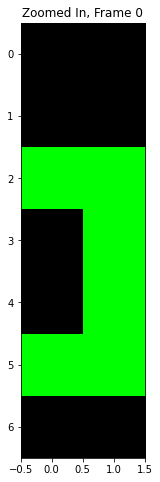

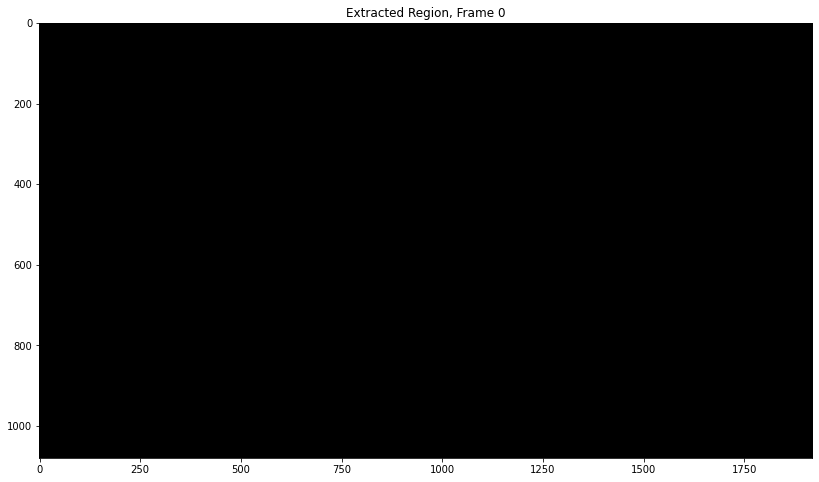

KeyboardInterrupt: 

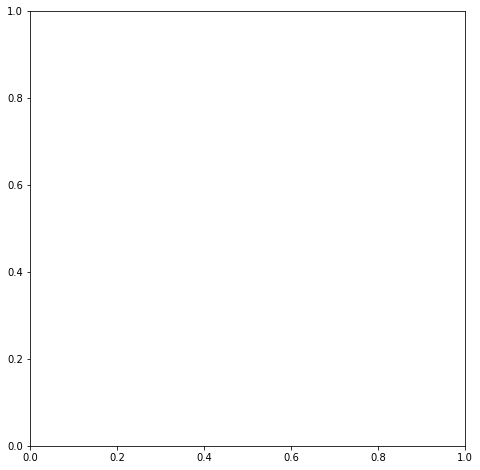

In [14]:
#image_list = #4","horizon_6"]
process_videos(["basic_dot",])